***Notebook 4：商業洞察與策略建議（Business Insights & Recommendations）***

**導言：為什麼需要商業整合？**

在前面的分析中，我們已深入探討了：
- 01顧客體驗與交易模式（探索性分析 data_exploration）
- 02時間趨勢與季節性異常（時間模式time pattern analysis）
- 03產品類別的銷售與利潤結構（產品與利潤 product_profit ）

本章的目標是將這些洞察進行**跨維度整合分析**，進一步提出具體可行的業務優化建議。


In [2]:
# 導入必要的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# 設置可視化風格
sns.set_style('whitegrid')
sns.set(font_scale=1.1)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

***4.1 月份 × 產品類別銷售熱力圖***

 **目的**：  
 為了支持最後結論分析我們希望分析「不同產品類別在每個月份的銷售表現」，也就是將 **時間維度（月）** 與 **品類（Product Category）** 結合，觀察產品的「季節性」。

這可以幫助我們回答：
- 哪些產品在特定月份爆發？（例如年末禮品類）
- 哪些產品一年四季穩定？
- 哪些潛力品類值得行銷加碼？

 ***洞察解讀與策略建議***

**我們觀察到以下幾個關鍵現象：**

1. **Fashion accessories** 和 **Home and lifestyle** 類別在 **11 月與 12 月銷售額明顯爆發**（超過 80,000+），屬於典型的**強季節性產品**，適合投入大量節慶行銷資源。

2. **Health and beauty** 類別銷售額全年偏低（平均每月僅約 3,900 元），且幾乎沒有明顯的波動，顯示其目前缺乏節奏性行銷或目標人群推廣。該類型在其他零售市場中通常具備禮贈、日常護理等潛力，建議重新設計促購活動（如搭配女性節慶、體驗組合等）。

3. **Electronic accessories** 雖然平均每月銷售略高於其他冷門品類（約 6,500 元），但其在 4–10 月的銷售額仍持續低迷（多月僅 2,000 左右），顯示產品潛力並未被有效開發。考慮該類別通常具備「高單價 × 高轉換率」的潛力，應優先納入資源優化與重新定位計畫中。

4. 相比之下，**Sports and travel** 雖然平均也不高，但屬於本身「非核心消費」的品類，購買行為較具特殊性，因此低銷售並不等於策略失敗，無須優先調整。

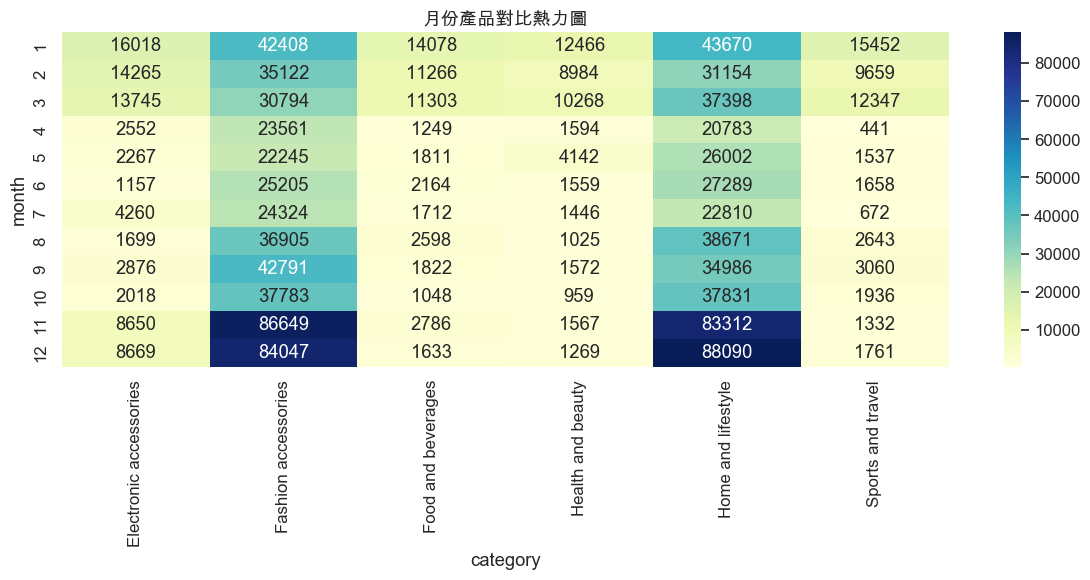

In [4]:

df = pd.read_excel("/Users/wendychu/Desktop/python/walmart ba project/my_env1/data/walmart_time.xlsx")
pivot_table=df.pivot_table(index="month",columns="category", values="total",aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(data=pivot_table,annot=True,fmt='.0f',cmap="YlGnBu")
plt.title("月份產品對比熱力圖")
plt.tight_layout()

plt.savefig("product_category_heatmap",dpi=300)

plt.show()

In [5]:
avg_sales = pivot_table.mean().sort_values()

# 計算每個品類的最高月與最低月差距（看是否有高峰）
range_sales = pivot_table.max() - pivot_table.min()

# 組合成表格觀察
summary = pd.DataFrame({
    '平均銷售額': avg_sales,
    '最大最小差': range_sales
})

summary.sort_values(by='平均銷售額', inplace=True)
display(summary)

,平均銷售額,最大最小差
category,,
Health and beauty,3904.265000,11506.55
Sports and travel,4374.827500,15011.14
Food and beverages,4455.940000,13029.72
Electronic accessories,6514.585833,14861.24
Fashion accessories,40986.158333,64403.35
Home and lifestyle,40999.671667,67306.96


***4.2 支付方式 × 產品類別銷售分析***
 **目的**：  
我們希望了解「不同支付方式的顧客，在購買哪些產品類別上有明顯偏好」，也就是將 **付款方式** 與 **品類偏好** 做交叉分析。

這樣可以幫助我們回答：
- 使用現金的顧客，是否更偏好某些類型的產品？
- 電子錢包族群是否消費金額較低，但購買頻率較高？
- 能否設計針對特定支付方式的行銷活動（如：刷卡贈品、現金折扣、e-wallet 回饋）

**洞察解讀與策略建議**

1. **Fashion accessories（時尚配件）** 和 **Home and lifestyle（家居生活）** 為全支付方式中銷售金額最高的兩大品類，顯示這兩個類別是穩定的營收主力。  
   - **信用卡族群最偏好這兩類**（各超過 200,000），可能因其客單價較高、適合分期付款。
   - 建議搭配信用卡分期、紅利點數兌換、VIP會員回饋等方案，提升轉單率與忠誠度。

2. **E-wallet 使用者**在 **Fashion accessories（195,210）與 Home and lifestyle（196,009）** 兩大主力品類的消費金額均非常高，幾乎與信用卡族群持平，顯示電子錢包用戶同樣具有高價品消費能力。  
   - 顯示此族群偏好單品結帳、快速購物體驗。
   - 建議設計「單品折扣、快速購買」的促銷策略，並與電子錢包平台合作推出即時回饋活動。

3. **Cash 現金顧客雖整體消費金額偏低**，但在 Fashion 及 Home 類別中仍有穩定貢獻（約 95,000），顯示傳統現金消費仍存在於實體門市。  
   -  可針對實體店面推行現金折扣或換購方案，促進線下消費。


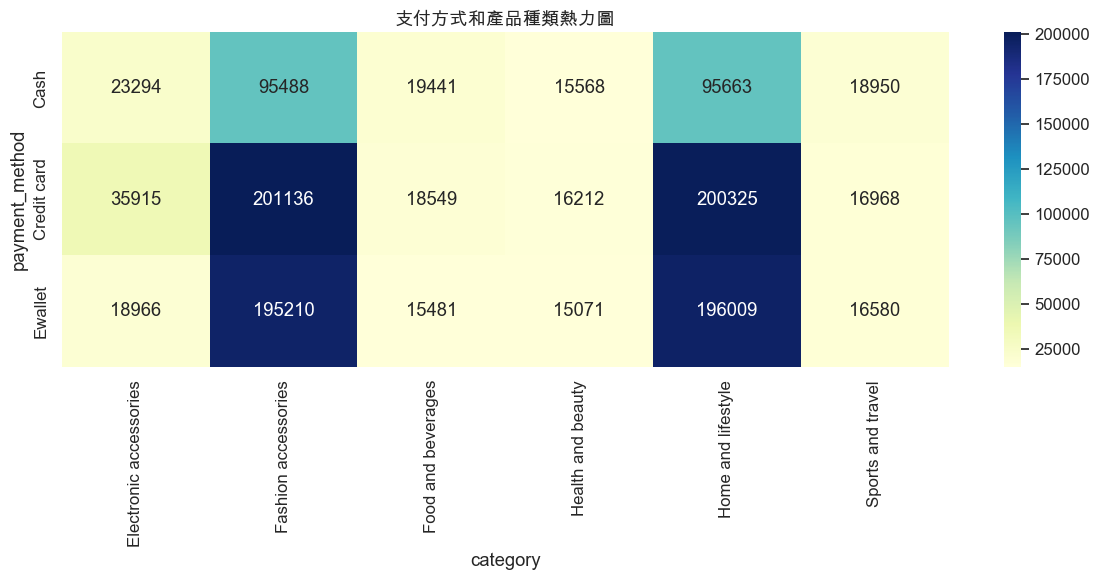

In [6]:
pivot_table_payway_cat=df.pivot_table(index="payment_method",columns="category",values="total",aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(data=pivot_table_payway_cat,annot=True,fmt='.0f',cmap="YlGnBu")
plt.title("支付方式和產品種類熱力圖")
plt.tight_layout()

plt.savefig("paymethod_category_heatmap",dpi=300)
plt.show()



***4.3. 統計檢定分析：不同支付方式的平均消費差異***

**目的**：我們希望了解，在「Fashion accessories」這一熱門產品類別中，顧客使用不同支付方式是否會影響其平均消費金額。

***統計結果摘要：***

- 使用 **ANOVA 檢定** 比較三種支付方式（現金、信用卡、電子錢包）的平均消費金額。
- 結果顯示：p < 0.05，代表這三種支付方式的平均消費存在統計上的顯著差異。
- 結合 boxplot 圖可觀察到：使用信用卡與電子錢包的顧客，在消費金額分布上明顯較高。

***統計洞察***

***1.Scipy 單因子 ANOVA 檢定：***
- p-value = 0.0043，表示三種付款方式之間存在顯著差異。
- 結論：這些平均值差異不是偶然，是統計上成立的。

***2.Statsmodels OLS 模型 + ANOVA 表:***
- •使用 ols() 建立模型，並以 anova_lm() 拆解變異來源。
- •結果顯示：payment_method 解釋了模型中的重要變異，p-value 亦小於 0.05。
- •結論：付款方式對消費金額具有解釋力與預測價值。


In [7]:
# 只拿出「Fashion accessories」這一類的資料
fashion_pay_method=df[df["category"]=="Fashion accessories"]

#用ANOVA變異數分析發現是否有差異
from scipy.stats import f_oneway

ewallet_fa=df[df["payment_method"]=="Ewallet"]["total"]
cash_fa=df[df["payment_method"]=="Cash"]["total"]
Creditcard_fa=df[df["payment_method"]=="Credit card"]["total"]

f_stat, p_value = f_oneway(cash_fa,Creditcard_fa,ewallet_fa)

print(f"anova 結果: f_value= {f_stat:.2f} , p_value= {p_value:.4f}")

if p_value < 0.05 :
    print("三種支付方式的平均消費有顯著差異")
else:
    print("三種支付方式差異不顯著")
    


anova 結果: f_value= 43.48 , p_value= 0.0000
三種支付方式的平均消費有顯著差異


In [8]:
#引用數據庫
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
model=ols("total ~ C(payment_method)",data=fashion_pay_method).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("anova_table：")
print(anova_table)

anova_table：
                         sum_sq      df         F    PR(>F)
C(payment_method)  7.606800e+04     2.0  5.453874  0.004308
Residual           3.180732e+07  4561.0       NaN       NaN


***4.4分析總結與關鍵洞察回顧***

本章節統整前三份分析筆記（Notebook 1～3）所萃取的核心洞察，並搭配視覺化圖表輔助說明。目的是將分析結果轉化為清楚、有邏輯的商業理解，作為後續策略制定的依據。

為了便於理解，本段落將依據以下順序進行：

1. data_exploration（顧客行為與消費結構）
2. time_pattern_analysis時間模式分析（趨勢與異常）
3. product_profit_analysi產品與利潤分析（品類策略與客群特徵）
4. Notebook 4（本章）：統計驗證與整合洞察

每一節皆包含：
- 洞察摘要（條列式）
- 對應圖表
- 總結建議句


***4.4.1 01 data_exploration（顧客行為與消費結構）***

本章節針對顧客評分、交易分布、產品結構與付款方式進行初步探索，萃取以下四項關鍵洞察：

1. **評分分佈呈多峰，體驗落差潛藏風險**  
   評分主要集中於 4、5、7、9 分，代表顧客體驗感受落差大，可能存在服務不一致問題。
2. **銷售額結構呈長尾分布，高價值顧客佔少數**  
   大多交易集中於中低金額區間，僅有少部分高額交易，但影響整體營收大。
3. **產品組合高度集中，主力商品佔比過高**  
   Fashion accessories 與 Home and lifestyle 兩大類別合計貢獻超過 75% 銷售，類別失衡明顯。
4. **付款方式影響消費金額，現金使用者客單價最高**  
   雖然電子錢包與信用卡使用頻繁，但現金付款族群平均消費金額更高，可能代表高忠誠度或傳統購物族群偏好。
  <img src="../visualizations/chapter1-output/exploratory_analysis.png" width="480">

分析總結建議：
1.	**提升顧客體驗一致性:**  
   顧客評分呈現多峰分布，主要集中在 4、5、7、9 分，反映出體驗不一致。建議針對低分顧客進行服務回訪與調查，並優化客服與評分機制，提升顧客滿意度穩定性。
2.	**針對高價值顧客設計差異化方案:**  
   銷售金額為長尾分布，顯示少數高價值顧客對營收貢獻極大。建議建立高消費顧客識別機制，推出 VIP 或會員制度，提升留存與回購率。
3.	**重新評估產品組合結構：**  
   Fashion Accessories 與 Home and Lifestyle 類別佔據超過 75% 銷售額，結構明顯失衡。建議後續深入分析其他類別的成長潛力，並探索分散營收的可能性。





***4.4.2 02 time_pattern_analysis(時間模式分析趨勢與異常)***

1. **銷售具強烈季節性：**
  - 每年 11～12 月為銷售高峰，銷售額是年中低谷的 2～3 倍，建議將行銷與庫存資源向年末集中配置。
  <img src="../visualizations/chapter2-output/monthly_trend.png" width="500">
 
2. **日內高峰集中於 14:00–19:00：**
  - 下午時段顧客活躍度高，適合推送行銷訊息與折扣活動。

  - <img src="../visualizations/chapter2-output/hour_sale_trendency.png" width="500">

3. **週二銷售表現異常較高：**
  - 週二明顯偏離週內其他日均值，可能與內部行銷策略或外部促銷時機（如會員日）相關，建議深入驗證成因。
 <img src="../visualizations/chapter2-output/weekly_sale_trend.png" width="500">

4. **每月 11 日為潛在促銷日:**

- 多個月份的 11 號皆出現異常高銷售，前 20 筆異常記錄中有 17 筆為 11 號，顯示可能存在「月中購物週期性」。
- 建議檢視內部活動紀錄（如會員日、特價日），或正式規劃為「月中固定促銷活動日」以提升穩定度與期待性。
每日異常次數分布圖（橫軸為每月日期）：
<img src="../visualizations/chapter2-output/outlier_point_of_sale.png" width="500">

5. **時間序列拆解顯示穩定季節性結構：**
- 時間序列分解揭示銷售波動以「年末旺季 + 年中平淡 + 穩定底部」為主，具備良好的預測基礎，後續可建立預測模型優化營運決策。
<img src="../visualizations/chapter2-output/Time Series Analysis.png" width="500">


**分析總結與建議**

1. **年底明顯為銷售旺季**，11~12 月銷售量遠高於其他月份，建議提前備貨並規劃年終促銷活動。
2. **每日銷售高峰集中於 14:00–19:00**，應安排高峰時段人力資源與物流支援。
3. **每月 11 日為潛在促銷日**，異常高銷售頻繁出現在此日，可設計為「月中品牌活動」吸引顧客注意。
4. **週二銷售高於週末**，與預期不同，建議調查顧客行為與可能的企業採購行為。

***4.4.3 product_profit_analysi(產品與利潤分析)***

1：**Fashion 與 Home 為金牛商品，為穩定現金來源核心**
- 此兩類商品合佔 70% 銷售總額，平均利潤亦高。
- 建議保持充足庫存、優化物流與營運效率，持續帶來穩定現金流。

- <img src="../visualizations/chapter3-output/products_catgory_bcg.png" width="500">


2: **Food 與 Health 雖非主力，卻具高頻潛力**

- Food and beverages 的客單價雖低，但平均每單商品數量高達 5 件以上，顯示消費者偏好高頻小額購物，適合作為流量導入與搭配促銷品項使用。
- 可作為促銷導流商品吸引顧客，進而帶動其他高利潤商品銷售。

- <img src="../visualizations/chapter3-output/category_avgprice_items.png" width="500">


3：**消費者購買行為明顯分層，應進行差異化定價**

- 高價產品（如電子類別）每筆交易金額高，但下單頻率低。
- 低價產品（如 Food）交易頻率高，但客單價低。
- 不同層級消費者購買模式有差異，可分層定價。

- <img src="../visualizations/chapter3-output/category_sales_summary_pic.png" width="500">
- <img src="../visualizations/chapter3-output/customer_tier_distribution.png" width="500">

**分析總結與建議**

1. **Fashion / Home 為銷售主力**，但營收高度依賴單一類別，建議提升非主力類別（如 Food / Health）占比以分散風險。
2. **Food / Health 類別具有潛力**：Food 有高成交頻率、Health 評價高但銷售少，建議成為「潛力品項培育對象」。
3. **消費層級行為分明**：高單價商品傾向大量購買但頻次低、低單價商品頻繁小額消費，建議實施分層定價策略（如高價組合包、低價折扣促銷）。
4. **產品組合集中度過高**，僅兩個品類占超過 70% 營收，建議採用 BCG 策略重新規劃資源分配與行銷投入。
- 補充說明：  
雖然 Sports 類別在分析中展現出「高客單價 × 高商品數量」的消費結構，但實際銷售市佔與總利潤皆處於偏低水準，屬於 BCG 矩陣中的「瘦狗」產品。  
建議未來可作為汰弱留強的評估標的，避免資源投入於無法轉化的低效類別。

***4.5商業策略建議***

根據對 Walmart 2019–2024 年的銷售資料分析，已從產品、時間、顧客與支付行為四大面向萃取出關鍵洞察。我們針對各面向提出以下短期、中期與長期可實施的策略，協助企業提升營收、分散風險並強化顧客忠誠度。

---

***策略 1：產品組合優化***

```text
時程           策略內容                                     
:------      :---------                               
短期（1-3 個月）   強化 Fashion / Home 類別優勢產品曝光與加購引導（搭配顧客消費層級）
中期（3-6 個月）   對 Food / Health 潛力類別進行小規模促銷測試與品牌合作       
長期（6-12 個月）  建立產品績效儀表板，定期檢視類別表現並重新配置資源                
```

**資料依據**：Fashion / Home 銷售額高達 75%；Food 評價高但銷量低，具導流潛力。
Health則是評價高客單價高

- <img src="../visualizations/chapter3-output/category_sales_summary_pic.png" width="500">
- <img src="../visualizations/chapter3-output/category_avgprice_items.png" width="500">

---

***策略 2：時間銷售節奏調控***

```text
時程           策略內容                                                                      
----------   --------------------------------------------------------------------------
短期（1-3 個月）   導入「11 號促銷日」制度，擴大原有銷售異常優勢                                                  
中期（3-6 個月）   規劃 4–7 月低谷期的專屬活動檔期（如季節轉換大促）                                               
長期（6-12 個月）  建立時間序列預測模型，協助庫存與人力預排                                                      
```

 **資料依據**：月銷售季節性強，年末旺季為年中數倍；每月 11 號具高銷售異常紀錄。
 ***可以發現在2022和2023年次數更多異常倍數也變大(七天平均)***

```text
年份      出現次數        異常總銷售額          平均異常倍數         
------  ----------  --------------  ---------------
2020    2           4453            2.19           
2021    3           8991            2.19           
2022    6           14446           2.21           
2023    6           14435           2.22           
```



 - <img src="../visualizations/chapter2-output/month_sale_seasonal_trend.png" width="500">

---

***策略 3：顧客行為分層行銷***

```text
時程           策略內容                                                                      
----------   --------------------------------------------------------------------------
短期（1-3 個月）   對高交易金額層級的顧客提供高價值組合與會員積分回饋                                                 
中期（3-6 個月）   對低總消費但高頻交易者提供數量折扣與搭配購推薦                                                   
長期（6-12 個月）  發展基於交易行為分層的推薦機制與個人化推播                                                     
```

 **資料依據**：商品客單價與購買數量呈分層，高價商品→低頻大單；低價商品→高頻小單。
 
- <img src="../visualizations/chapter3-output/customer_tier_distribution.png" width="500">


***策略 4：支付偏好導向行銷***

```text
時程           策略內容                                                                      
----------   --------------------------------------------------------------------------
短期（1-3 個月）   對現金族群推出大額消費回饋，提升忠誠度                                                       
中期（3-6 個月）   與電子錢包平台合作推出「單品閃促 + 即時回饋」                                                  
長期（6-12 個月）  建立支付方式推薦邏輯與 A/B 測試行銷成效                                                    
```

**資料依據**：ANOVA / OLS 顯示支付方式對消費顯著影響，現金消費者為高價值族群；電子錢包消費者偏好快速小額消費。
 - <img src="../visualizations/chapter4-output/avgprice_paymentmethod.png" width="500">
 - <img src="../visualizations/chapter4-output/paymethod_category_heatmap.png" width="500">

***4.6成果預期與分析限制***

***實施效益預估***

根據本專案提出的四大策略（品類優化、淡季促銷、顧客分層、支付精準行銷），若逐步實施，預期可產生以下實質效益：

***商品策略｜提升營收結構穩定性***

- 目前 Fashion / Home 類別佔比過高，形成高度依賴。
- 若成功將 Food / Health 類別市佔提高 5%，可有效降低業務風險，並實現產品組合多元化，提升中長期獲利穩定性。

***時間策略｜淡季促銷激活潛力時段***

- 根據異常偵測分析，每月 11 日多次出現異常高銷售。
- 若規劃為「月中促銷日」並結合 4~7 月淡季行銷活動，可望帶動淡季銷售回溫，提升整體年度營收均衡度。

***顧客策略｜提高回購率與 CLV***

- 根據交易總金額與購買商品數進行分層分析，發現高交易價值群（高總金額、滿意度高）具備忠誠度潛力。
- 若針對此群體導入會員制度、高價值組合設計與回饋機制，預期可提高回購率與顧客終身價值（Customer Lifetime Value）。
- 同時對於低價高頻顧客，可透過搭配購、滿額加贈等手段提升每次交易價值，擴大總利潤。

***支付策略｜推進多元支付轉換與促銷***
- 電子錢包用戶在 Fashion 類別中活躍，但整體消費偏低。
- 若設計針對 e-wallet 使用者的「快速結帳回饋機制」，可提升此族群的轉換率與整體消費額，補足支付差異。
 - 現金付款族群平均消費金額高，具備高潛力價值，若針對此類群體設計「會員回饋機制」，預期可有效提升回購率。
 
> 🔎 本專案使用真實交易資料（含評分、品類、付款方式等）進行統計驗證與行為分析，所有建議皆具備數據依據，可為日後預測建模與 A/B 測試奠定基礎。


---

***分析限制與風險提醒***

1. 資料為 2019–2024 非連續樣本，部分月份交易數量偏少，可能影響時間趨勢穩定性。
2. 未包含顧客 ID 與訪問紀錄，無法進行完整的 RFM 分析與用戶成長模型。
3. 部分策略（如月中促銷、會員制度）需視品牌內部營運能力與資源決策情境調整實施規模。

---
***專案總結***

本專案從探索、趨勢、品類、支付等多面向分析，結合統計驗證與視覺化結果，產出具備可執行性之商業洞察。建議企業可透過策略拆解與實驗驗證，**逐步轉化數據為決策行動力，推動銷售優化與顧客經營效益提升。**